# 用户特征提取

In [1]:
import pandas as pd

# read sessionDF 
sessionDF = pd.read_csv("../data/dataset/session.csv")
sessionDF = sessionDF.drop(['Unnamed: 0'], axis=1)
sessionDF

,userId,name,institutionId,urls,ips,startTime,endTime,aveageHETime,heNumber,citys
0,053982f7c98843c0b3bccb1b06723789,秦颖,310111,704-542-29-704-878-155-708-233-80-29-640-195-5...,159.226.195.234,1.598497e+09,1.598497e+09,0.360214,42,NaN
1,10e6787efee641abaadb00b89559fb7b,测试,310111,171-97-97-117-97-97-97-763-812-561-171-68-573-...,159.226.99.36,1.597651e+09,1.597651e+09,0.544031,65,NaN
2,10e6787efee641abaadb00b89559fb7b,测试,310111,704-542-29-704-878-640-155-80-547-233-29-195-1...,159.226.99.41,1.597717e+09,1.597717e+09,0.869615,109,NaN
3,10e6787efee641abaadb00b89559fb7b,测试,310111,704-542-29-878-704-80-640-155-547-233-29-708-1...,159.226.99.41,1.597717e+09,1.597717e+09,0.211702,84,NaN
4,10e6787efee641abaadb00b89559fb7b,测试,310111,704-542-29-704-878-640-80-547-233-29-155-708-1...,159.226.99.41,1.597911e+09,1.597911e+09,0.689574,94,NaN
...,...,...,...,...,...,...,...,...,...,...
14978,dab1560caab5494ca55df4ef513d922c,所级管理员,310111,506-519-373-373-373-506-506-506-373-373-373-50...,159.226.188.210,1.598866e+09,1.598866e+09,11.590235,17,NaN
14979,dab1560caab5494ca55df4ef513d922c,所级管理员,310111,878-878-146-805-42-373-42-373-42-373-519-506-3...,159.226.174.246,1.598866e+09,1.598866e+09,1.957724,29,NaN
14980,dab1560caab5494ca55df4ef513d922c,所级管理员,321121,704-542-29-878-732-873-704-467-541-418-29-180-...,210.72.134.31,1.601177e+09,1.601177e+09,2.788200,75,NaN
14981,dab1560caab5494ca55df4ef513d922c,所级管理员,321121,542-704-29-467-873-732-704-878-29-418-180-541-...,210.72.134.31,1.605084e+09,1.605084e+09,1.312937,32,NaN


In [2]:
import sys
sys.path.append("..")

from modules.userUtils.user import User
from modules.userUtils.user import USER_TABLE_LABELS

users = []
for userId, df in sessionDF.groupby(['userId']):
    
    user = User(df)
    users.extend([user.getSet()])
    
userDF = pd.DataFrame(users, columns=USER_TABLE_LABELS)
userDF.to_csv('../data/dataset/userDF.csv', sep="^", encoding="utf-8")
userDF

,userId,name,institutionId,urls,ips,startTimes,aveageContinueTime,aveageHETime,heNumber
0,053982f7c98843c0b3bccb1b06723789,秦颖,310111,"{""704-542-29-704-878-155-708-233-80-29-640-195...","{""159.226.195.234"": 1}","{""10"": ""1""}",15.129000,0.360214,42.000000
1,10e6787efee641abaadb00b89559fb7b,测试,310111,"{""704-542-29-878-704-80-640-155-547-233-29-708...","{""159.226.99.41"": 3, ""159.226.99.33"": 1, ""159....","{""10"": ""2"", ""16"": ""2"", ""15"": ""1""}",48.257400,0.530923,87.200000
2,140fedbc28954b4f88cd14357c38a624,王贺冉,310111,"{""381-117-686-488-97-97-97-97-97-381-381-805-8...","{""159.226.99.35"": 7, ""222.129.61.98"": 1}","{""10"": ""2"", ""9"": ""2"", ""15"": ""1"", ""13"": ""1"", ""1...",6277.909875,140.053402,63.000000
3,149492352b734619a613f2b1b593cdfb,文印室,310111,"{""615-171-652-652-615-171-652-652-615-171-652-...","{""159.226.99.33"": 125, ""159.226.99.42"": 1}","{""8"": ""29"", ""9"": ""23"", ""14"": ""18"", ""13"": ""14"",...",2359.809397,23.918116,111.571429
4,1e881263e4574a7d8bb7795c5b4539c1,侯云玲,310111,"{""704-542-29-704-878-29-640-80-233-155-547-708...","{""159.226.99.38"": 2}","{""10"": ""1"", ""17"": ""1""}",75.922000,0.785484,84.000000
...,...,...,...,...,...,...,...,...,...
837,c7e364e631c94e6c89fe7480f7979ae6,郑国强,310111,"{""704-542-29-155-878-704-180-155-29-708-233-19...","{""159.226.99.36"": 81, ""159.226.165.17"": 5, ""22...","{""14"": ""16"", ""15"": ""15"", ""16"": ""13"", ""8"": ""12""...",1891.909648,20.898366,84.032967
838,ce8cf95981644560bad6c88d3e9dee2d,徐冉冉,310111,"{""704-542-29-704-155-878-29-180-155-155-274-70...","{""159.226.99.39"": 1}","{""9"": ""1""}",571.138000,5.054319,113.000000
839,d467b39aa80b43a09cd9437e61f5acce,弓晓飞,310111,"{""113-122-29-29-155-763-155-515-171-740-97-97-...","{""159.226.99.41"": 9, ""159.226.99.35"": 6, ""117....","{""15"": ""9"", ""16"": ""8"", ""14"": ""2"", ""17"": ""1"", ""...",309.544640,2.423303,88.560000
840,dab1560caab5494ca55df4ef513d922c,所级管理员,310111,"{""146"": ""2"", ""21-21-95-95-14-662-0-810-810-14-...","{""159.226.99.42"": 36, ""159.226.174.70"": 19, ""1...","{""15"": ""25"", ""16"": ""21"", ""9"": ""21"", ""14"": ""16""...",1219.846970,22.677508,46.440299


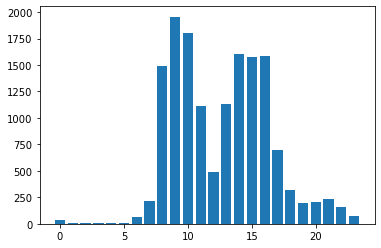

In [3]:
sessionDF.startTime.values.tolist()[0]
import datetime
d = sessionDF.startTime.apply(lambda x: datetime.datetime.fromtimestamp(x).hour).value_counts()
import matplotlib.pyplot as plt
plt.bar(d.keys(), d.values)
plt.savefig("../data/pngs/执行操作的时间段.jpg")

In [6]:
import json

urlIndexToUrl = {}
with open("../data/url/urlIndexToUrl.json", "r", encoding="utf-8") as f:
    urlIndexToUrl = json.loads(f.read())

In [7]:
def topKOfDict(dic, k):
    if type(dic) == str:
        dic = json.loads(dic)
    t = pd.Series(dic.values(), index=dic.keys())
    return t.sort_values(ascending=False)[:k].index.tolist()
    
def oneUrlExtract(urls):
    counts = {}
    for urlIndexs, count in json.loads(urls).items():
        count = int(count)
        for urlIndex in urlIndexs.split("-"):
            url = urlIndexToUrl[urlIndex]
            counts[url] = counts[url]+count if url in counts else count
    
    return topKOfDict(counts, 5)

def modulesExtract(urls):
    
    moduleCounts = {}
    for urlIndexs, count in json.loads(urls).items():
        count = int(count)
        for urlIndex in urlIndexs.split("-"):
            url = urlIndexToUrl[urlIndex]
            module = url.split('/')[1]
            moduleCounts[module] = moduleCounts[module] + count if module in moduleCounts else count
    return moduleCounts

    
    
# user = userDF.loc[0]
# oneUrlExtract(user.urls)
# modulesExtract(user.urls)

In [8]:
userDF['frequentURLs'] = userDF.urls.apply(oneUrlExtract) 
userDF['moduleCounts'] = userDF.urls.apply(modulesExtract)
userDF

,userId,name,institutionId,urls,ips,startTimes,aveageContinueTime,aveageHETime,heNumber,frequentURLs,moduleCounts
0,053982f7c98843c0b3bccb1b06723789,秦颖,310111,"{""704-542-29-704-878-155-708-233-80-29-640-195...","{""159.226.195.234"": 1}","{""10"": ""1""}",15.129000,0.360214,42.000000,"[/fin/arBill/deleteGwHomeVouchersById, /hr/sys...","{'hr': 10, 'fin': 20, 'od': 9, 'fa': 2, 'pm': 1}"
1,10e6787efee641abaadb00b89559fb7b,测试,310111,"{""704-542-29-878-704-80-640-155-547-233-29-708...","{""159.226.99.41"": 3, ""159.226.99.33"": 1, ""159....","{""10"": ""2"", ""16"": ""2"", ""15"": ""1""}",48.257400,0.530923,87.200000,"[/fin/rmGuaranteeOut/updateGuarantee, /fin/rmE...","{'hr': 66, 'fin': 279, 'fa': 28, 'od': 44, 'pm..."
2,140fedbc28954b4f88cd14357c38a624,王贺冉,310111,"{""381-117-686-488-97-97-97-97-97-381-381-805-8...","{""159.226.99.35"": 7, ""222.129.61.98"": 1}","{""10"": ""2"", ""9"": ""2"", ""15"": ""1"", ""13"": ""1"", ""1...",6277.909875,140.053402,63.000000,"[/fin/rmGuaranteeOut/updateGuarantee, /fin/rmE...","{'od': 45, 'hr': 128, 'fin': 217, 'pm': 27, 'f..."
3,149492352b734619a613f2b1b593cdfb,文印室,310111,"{""615-171-652-652-615-171-652-652-615-171-652-...","{""159.226.99.33"": 125, ""159.226.99.42"": 1}","{""8"": ""29"", ""9"": ""23"", ""14"": ""18"", ""13"": ""14"",...",2359.809397,23.918116,111.571429,"[/fin/rmGuaranteeOut/updateGuarantee, /fin/lab...","{'pm': 592, 'fin': 8671, 'hr': 2972, 'od': 797..."
4,1e881263e4574a7d8bb7795c5b4539c1,侯云玲,310111,"{""704-542-29-704-878-29-640-80-233-155-547-708...","{""159.226.99.38"": 2}","{""10"": ""1"", ""17"": ""1""}",75.922000,0.785484,84.000000,"[/fin/rmGuaranteeOut/updateGuarantee, /fin/rmE...","{'hr': 28, 'fin': 108, 'fa': 14, 'od': 10, 'pm..."
...,...,...,...,...,...,...,...,...,...,...,...
837,c7e364e631c94e6c89fe7480f7979ae6,郑国强,310111,"{""704-542-29-155-878-704-180-155-29-708-233-19...","{""159.226.99.36"": 81, ""159.226.165.17"": 5, ""22...","{""14"": ""16"", ""15"": ""15"", ""16"": ""13"", ""8"": ""12""...",1891.909648,20.898366,84.032967,"[/fin/rmGuaranteeOut/updateGuarantee, /fin/arB...","{'hr': 1346, 'fin': 4516, 'pm': 397, 'od': 832..."
838,ce8cf95981644560bad6c88d3e9dee2d,徐冉冉,310111,"{""704-542-29-704-155-878-29-180-155-155-274-70...","{""159.226.99.39"": 1}","{""9"": ""1""}",571.138000,5.054319,113.000000,"[/fin/rmGuaranteeOut/updateGuarantee, /fin/rmE...","{'hr': 23, 'fin': 63, 'pm': 6, 'od': 13, 'fa': 8}"
839,d467b39aa80b43a09cd9437e61f5acce,弓晓飞,310111,"{""113-122-29-29-155-763-155-515-171-740-97-97-...","{""159.226.99.41"": 9, ""159.226.99.35"": 6, ""117....","{""15"": ""9"", ""16"": ""8"", ""14"": ""2"", ""17"": ""1"", ""...",309.544640,2.423303,88.560000,"[/fin/rmGuaranteeOut/updateGuarantee, /fin/rmE...","{'fin': 1399, 'fa': 151, 'od': 204, 'hr': 347,..."
840,dab1560caab5494ca55df4ef513d922c,所级管理员,310111,"{""146"": ""2"", ""21-21-95-95-14-662-0-810-810-14-...","{""159.226.99.42"": 36, ""159.226.174.70"": 19, ""1...","{""15"": ""25"", ""16"": ""21"", ""9"": ""21"", ""14"": ""16""...",1219.846970,22.677508,46.440299,[/hr/payCostElementSoaMap/getPayRollsOnPayEleS...,"{'fin': 2462, 'hr': 2328, 'pm': 273, 'portal':..."


In [13]:
userDF.to_csv("../data/dataset/userDF.csv", sep='^', encoding="utf-8")

In [ ]:
import pandas as pd
userDF = pd.read_csv("../data/dataset/userDF.csv", sep='^', encoding="utf-8", index_col=0)
userDF

{'fin': 4516, 'hr': 1346, 'od': 832, 'fa': 526, 'pm': 397, 'portal': 30}


(-0.5, 999.5, 699.5, -0.5)

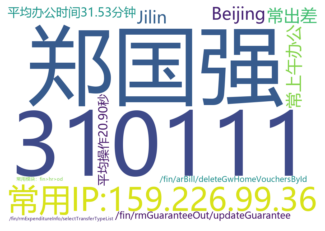

In [87]:
import wordcloud
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from modules.api.iplocation import getLocationByBin

binPath = '../modules/api/IP2LOCATION.BIN'


def createLabels(user: pd.DataFrame):
#   基础信息
    labels = [
        user['name'],
        str(user['institutionId'])
    ]
#     常用IP
    ips = topKOfDict(user['ips'], 3)
    preferIP = ips[0]
    labels.append("常用IP:{0}".format(preferIP))
#     常用地点
    citys = list(set(getLocationByBin(ip, binPath) for ip in ips))
    labels.extend(citys)
#     出差情况
    if len(citys) > 1:
        labels.append("常出差")
    else:
        labels.append("不常出差")
#     工作时间情况
    startTimes = topKOfDict(user['startTimes'], 2)
    a = int(startTimes[0])
    if a < 12:
        labels.append("常上午办公")
    elif a < 18:
        labels.append("常下午办公")
    elif a < 23:
        labels.append("夜猫子")
    else:
        labels.append("凌晨工作")
    
#     aveageContinueTime 平均办公持续时间
    aveageContinueTime = user['aveageContinueTime']
    if aveageContinueTime < 60:
        labels.append("每次办公时间不到一分钟")
    elif aveageContinueTime < 3600:
        labels.append("平均办公时间%.2f分钟"% (aveageContinueTime/60.0))
    else:
        labels.append("平均办公时间%.2f分钟"% (aveageContinueTime/60.0))
        
#     aveageHETime
    aveageHETime = user['aveageHETime']
    if aveageHETime < 60:
        labels.append("平均操作%.2f秒" % aveageHETime)
    elif aveageHETime < 3600:
        labels.append("平均操作%.2f分钟" % (aveageHETime/60.0))

#    frequentURLs
    frequentURLs = user['frequentURLs']
    moduleCounts = user['moduleCounts']
    labels.extend(frequentURLs[:3])
    mc = topKOfDict(moduleCounts, 3)
    labels.append("常用模块：%s" % ">".join(mc))
    
    return labels
    
user = userDF.loc[837]
# topKOfDict(user['ips'], 1)[0]
labels = createLabels(user)
labelsDict = {i: 1 for i in labels}

wc = wordcloud.WordCloud(font_path="../data/fonts/msyh.ttc", 
#                          min_font_size=24,
#                          max_font_size=80,
                         background_color="white",
                         width=1000,
                         height=700)
p = wc.fit_words(labelsDict)
plt.figure()
plt.imshow(p, interpolation="bilinear")
plt.axis("off")

In [9]:
modules = {
    "fa": 0,
    "fin": 1,
    "od": 2,
    "hr": 3,
    "pm": 4,
    "portal": 5
}

moduleLabels = ['fa', 'fin', 'od', 'hr', 'pm', 'portal']

data = []
for user in userDF.itertuples():
    t = user.moduleCounts
    total = sum(t.values())
    line = []
    
    for module in moduleLabels:
        value = t[module]+1 if module in t else 1
        line.append(value/(total+1))

    data.append(line)

import numpy as np
trainData = np.array(data)
trainData

array([[0.06976744, 0.48837209, 0.23255814, 0.25581395, 0.04651163,
        0.02325581],
       [0.06636156, 0.64073227, 0.10297483, 0.15331808, 0.03432494,
        0.01372998],
       [0.17425743, 0.43168317, 0.09108911, 0.25544554, 0.05544554,
        0.0019802 ],
       ...,
       [0.06862302, 0.63205418, 0.09255079, 0.15711061, 0.04469526,
        0.00722348],
       [0.04514781, 0.39572622, 0.11873393, 0.37419666, 0.04402314,
        0.02297558],
       [0.12820513, 0.43589744, 0.07692308, 0.38461538, 0.07692308,
        0.02564103]])

In [14]:
moduleLabels = ['fa', 'fin', 'od', 'hr', 'pm', 'portal']

data = []
for user in userDF.itertuples():
    t = user.moduleCounts
    total = sum(t.values())
    line = []
    for module in moduleLabels:
        value = t[module]+1 if module in t else 1    
        line.append(value)
    if total > 300 and total < 2000:
        data.append(line)

data[:4]



[[29, 280, 45, 67, 15, 6],
 [88, 218, 46, 129, 28, 1],
 [24, 151, 57, 111, 18, 4],
 [68, 118, 5, 187, 5, 1]]

In [106]:
trainData.tofile("../data/dataset/modules.npy")

In [202]:
from sklearn.cluster import KMeans

inertias = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(trainData)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot([k for k in range(5, 25)], inertias)

In [115]:
kmeans.inertia_

5.022254343079145

In [25]:
import IP2Location

def getLocation():
    pass

ip2locObj = IP2Location.IP2Location()
ip2locObj.open("../modules/api/IP2LOCATION.BIN")
ip2locObj.get_all("159.226.189.206")

# ip2locObj.get_all("127.0.0.1")

{'ip': '159.226.189.206', 'country_short': 'CN', 'country_long': 'China', 'region': 'Beijing', 'city': 'Mentougou', 'latitude': 39.939171, 'longitude': 116.091667, 'zipcode': '102300', 'timezone': '+08:00'}

In [197]:
# excel
from openpyxl import Workbook, load_workbook

import openpyxl
import os

filepath = "C:/Users/CNIC/Desktop/齐硕/0.xlsx"
wb = openpyxl.load_workbook(filepath)

########

for day in range(3, 33):
    
    sheet = wb.copy_worksheet(wb['2'])
    sheet.title = str(day)
    
    row = 22

    for col in range(2, 36):
        value = sheet.cell(row=row, column=col).value
        newValue = value.replace("'1'", "'{0}'".format(day-1))
        sheet.cell(row=row, column=col).value = newValue

wb.save(filepath)
